In [133]:
import baseline
import importlib
importlib.reload(baseline)
from baseline import *
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
data = pd.read_csv('full_data.csv')

In [139]:
data = data.fillna(0)

In [140]:
reduce_mem_usage(data)
data.info()

Mem. usage decreased to 695.78 Mb (0.0% reduction)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054182 entries, 0 to 11054181
Data columns (total 36 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   date_block_num                       int8   
 1   shop_id                              int8   
 2   item_cnt_month                       float16
 3   item_id                              int16  
 4   city_id                              int8   
 5   item_category_id                     int8   
 6   main_category_id                     int8   
 7   minor_category_id                    int8   
 8   shop_history                         int8   
 9   item_history                         float16
 10  minor_category_history               int8   
 11  first_sales_date_block               float16
 12  avg_item_cnt_per_cat_lag_1           float16
 13  avg_item_cnt_per_shop_lag_1          float16
 14  avg_item_cnt_per_item_lag_1  

LinearRegression

LinearRegression
RMSE for split 1: 0.749
RMSE for split 2: 0.699
RMSE for split 3: 0.678
Mean RMSE for all splits: 0.709


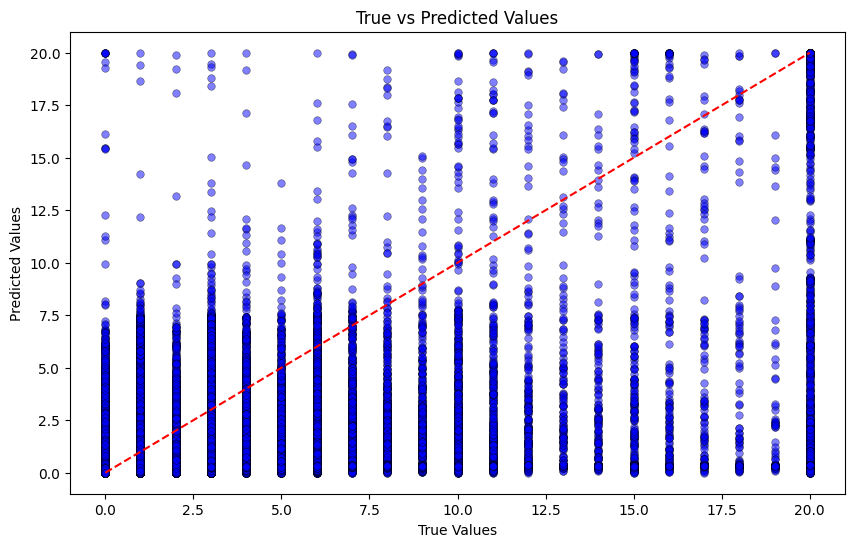

In [141]:
y_val, y_pred, model = tss_cv(df = data, n_splits = 3, model = LinearRegression())
true_pred_plot(y_val, y_pred)

In [8]:
X_test = data[data.date_block_num == 34].drop('item_cnt_month', axis = 1)

X = data[data.date_block_num != 34].drop('item_cnt_month', axis = 1)
y = data[data.date_block_num != 34]['item_cnt_month']

In [ ]:
model = LinearRegression()
model.fit(X, y)
prediction(X_test, model)

'Submission file created'

Linear Regression. Submission score: 1.15561

XGBRegressor

XGBRegressor
RMSE for split 1: 0.726
RMSE for split 2: 0.620
RMSE for split 3: 0.616
Mean RMSE for all splits: 0.654


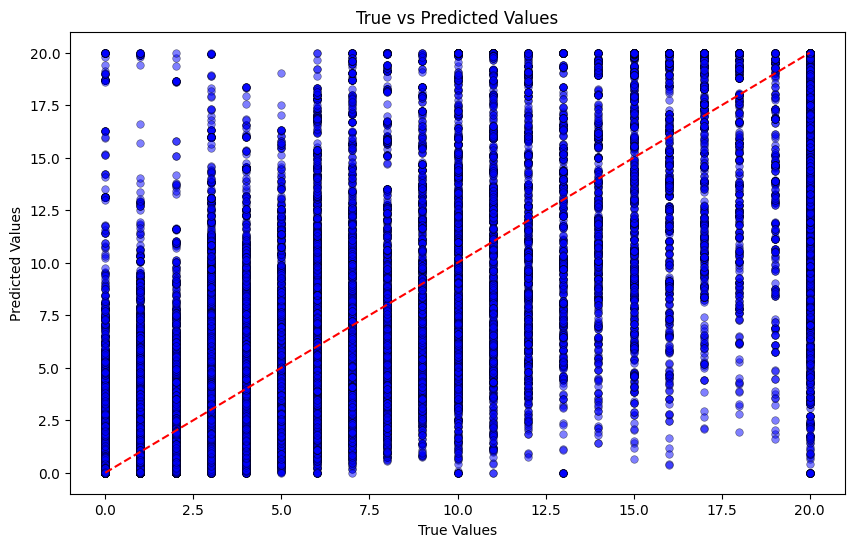

In [4]:
y_val, y_pred, model = tss_cv(df = data, n_splits = 3, model = XGBRegressor())
true_pred_plot(y_val, y_pred)

In [5]:
X_train, y_train, X_val, y_val, X_test = data_split(data)
model = XGBRegressor(n_estimators = 75, eval_metric="rmse", early_stopping_rounds = 20)
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train,y_train, eval_set=eval_set, verbose=True)
prediction(X_test, model)

[0]	validation_0-rmse:1.02830	validation_1-rmse:1.00058
[1]	validation_0-rmse:0.85337	validation_1-rmse:0.85336
[2]	validation_0-rmse:0.74652	validation_1-rmse:0.76592
[3]	validation_0-rmse:0.68344	validation_1-rmse:0.71760
[4]	validation_0-rmse:0.64593	validation_1-rmse:0.68245
[5]	validation_0-rmse:0.62290	validation_1-rmse:0.66591
[6]	validation_0-rmse:0.60774	validation_1-rmse:0.64767
[7]	validation_0-rmse:0.59766	validation_1-rmse:0.64260
[8]	validation_0-rmse:0.59108	validation_1-rmse:0.64165
[9]	validation_0-rmse:0.58506	validation_1-rmse:0.63030
[10]	validation_0-rmse:0.58084	validation_1-rmse:0.62274
[11]	validation_0-rmse:0.57576	validation_1-rmse:0.61836
[12]	validation_0-rmse:0.57270	validation_1-rmse:0.61685
[13]	validation_0-rmse:0.56999	validation_1-rmse:0.61177
[14]	validation_0-rmse:0.56807	validation_1-rmse:0.61114
[15]	validation_0-rmse:0.56639	validation_1-rmse:0.60921
[16]	validation_0-rmse:0.56491	validation_1-rmse:0.60808
[17]	validation_0-rmse:0.56274	validation

'Submission file created'

XGBRegression. Submission score: 1.21929

Higher submission score for Linear Regression means, that our data have data leakage.

LightGBM

LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.131250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3487
[LightGBM] [Info] Number of data points in the train set: 2764345, number of used features: 34
[LightGBM] [Info] Start training from score 0.268139
RMSE for split 1: 0.627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.302629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3694
[LightGBM] [Info] Number of data points in the train set: 5528690, number of used features: 34
[LightGBM] [Info] Start training from score 0.292546
RMSE for split 2: 0.556
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.427681 seconds.
You can set `force

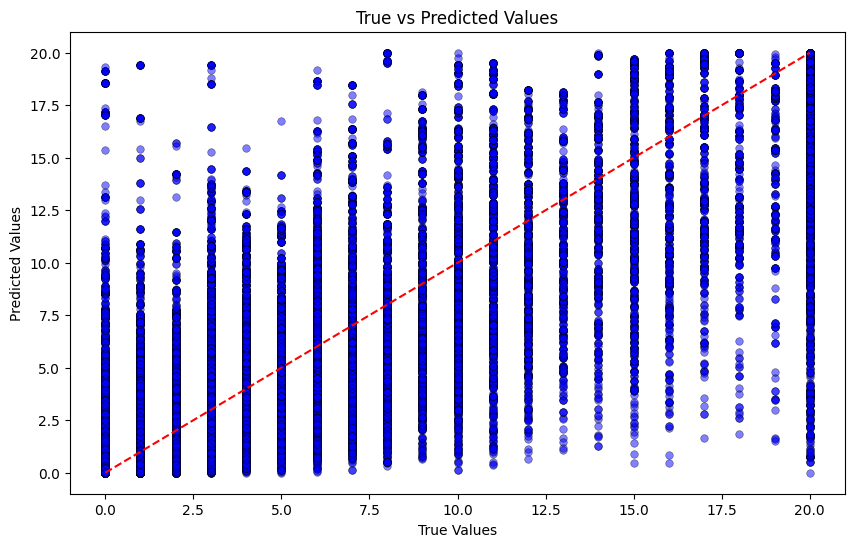

In [7]:
y_val, y_pred, model = tss_cv(df = data, n_splits = 3, model = LGBMRegressor())
true_pred_plot(y_val, y_pred)

In [8]:
model = LGBMRegressor()
X_train, y_train, X_val, y_val, X_test = data_split(data)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])
prediction(X_test, model)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.519379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3913
[LightGBM] [Info] Number of data points in the train set: 10815789, number of used features: 34
[LightGBM] [Info] Start training from score 0.288940


'Submission file created'

LightGBM. Submission score: 1.19577

In [40]:
results = feature_importancy_check(df = data)

Feature importance evaluation: 100%|███████| 19/19 [27:51<00:00, 87.95s/it]

Feature: Baseline, RMSE: 0.9490313169938716, Importance: 29.71%
Feature: avg_item_cnt_per_item_lag_1, RMSE: 0.9522484580942949, Importance: 67.55%
Feature: avg_item_price_month_lag_1, RMSE: 1.2519723751809426, Importance: 20.59%
Feature: avg_item_price_lag_1, RMSE: 1.271449084374841, Importance: 22.82%
Feature: sales_per_category_per_shop_lag_1, RMSE: 1.3062282056298549, Importance: 10.55%
Feature: avg_item_cnt_per_date_block_lag_2, RMSE: 1.3312279468492094, Importance: 39.63%
Feature: item_cnt_month_lag_2, RMSE: 1.3312279468492094, Importance: 39.63%
Feature: avg_item_cnt_per_cat_lag_1, RMSE: 1.3437364505569152, Importance: 37.80%
Feature: avg_item_cnt_per_shop_lag_1, RMSE: 1.3574031816180556, Importance: 4.31%
Feature: avg_item_cnt_per_cat_per_shop_lag_1, RMSE: 1.3622460103152187, Importance: 46.51%
Feature: med_item_cnt_per_cat_per_shop_lag_1, RMSE: 1.3635546913303704, Importance: 49.80%
Feature: avg_item_cnt_per_date_block_lag_1, RMSE: 1.3749281712375425, Importance: 43.71%
Feature

In [42]:
results_df = pd.DataFrame(results, columns=['Feature', 'RMSE', 'Feature_Importance'])

# Convert RMSE and Feature Importance columns to numeric types
results_df['RMSE'] = pd.to_numeric(results_df['RMSE'])
results_df['Feature_Importance'] = pd.to_numeric(results_df['Feature_Importance'])
results_df.sort_values('Feature_Importance', ascending = False)

,Feature,RMSE,Feature_Importance
1,avg_item_cnt_per_item_lag_1,0.952248,67.551857
10,med_item_cnt_per_cat_per_shop_lag_1,1.363555,49.804729
9,avg_item_cnt_per_cat_per_shop_lag_1,1.362246,46.508892
11,avg_item_cnt_per_date_block_lag_1,1.374928,43.714706
12,item_cnt_month_lag_1,1.374928,43.714706
18,avg_item_cnt_per_minor_cat_lag_1,1.421067,40.006390
6,item_cnt_month_lag_2,1.331228,39.627079
5,avg_item_cnt_per_date_block_lag_2,1.331228,39.627079
7,avg_item_cnt_per_cat_lag_1,1.343736,37.803272
16,avg_item_cnt_per_date_block_lag_3,1.412115,37.188633


In [127]:
tmp.columns

Index(['date_block_num', 'shop_id', 'item_cnt_month', 'item_id', 'city_id',
       'item_category_id', 'main_category_id', 'minor_category_id',
       'shop_history', 'item_history', 'minor_category_history',
       'first_sales_date_block', 'item_last_sale', 'item_shop_first_sale',
       'item_first_sale', 'avg_item_cnt_per_shop_lag_1',
       'med_item_cnt_per_cat_per_shop_lag_1', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'sales_per_category_per_shop_lag_1', 'sales_per_shop_lag_1',
       'sales_per_item_lag_1', 'avg_item_price_month_lag_1'],
      dtype='object')

<Axes: >

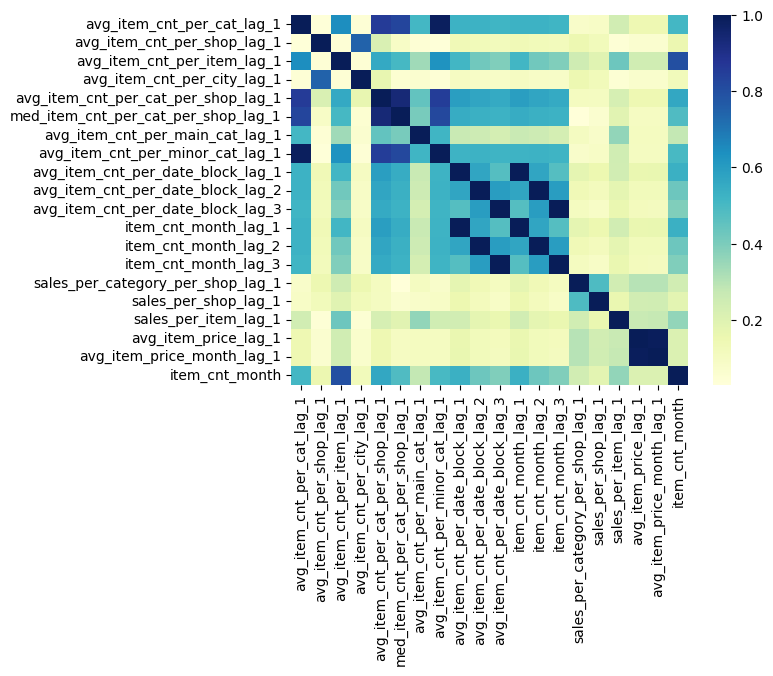

In [49]:
lag_columns = list(data.loc[:, data.columns.str.contains('_lag_')].columns)
sns.heatmap(data.loc[:, lag_columns+['item_cnt_month']].corr(), cmap="YlGnBu")

In [125]:
columns_check = ['date_block_num', 'shop_id', 'item_cnt_month', 'item_id', 'city_id',
       'item_category_id', 'main_category_id', 'minor_category_id',
       'shop_history', 'item_history', 'minor_category_history',
       'first_sales_date_block', 'item_last_sale', 'item_shop_first_sale', 'item_first_sale',
       'avg_item_cnt_per_shop_lag_1','med_item_cnt_per_cat_per_shop_lag_1', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_3', 
       'sales_per_category_per_shop_lag_1', 'sales_per_shop_lag_1',
       'sales_per_item_lag_1','avg_item_price_month_lag_1']
tmp = data.loc[:, columns_check]
X_train, y_train, X_val, y_val, X_test = data_split(tmp)
model = XGBRegressor(n_estimators = 75, eval_metric="rmse", early_stopping_rounds = 20)
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train,y_train, eval_set=eval_set, verbose=True)
prediction(X_test, model)

[0]	validation_0-rmse:1.11271	validation_1-rmse:1.06194
[1]	validation_0-rmse:0.99973	validation_1-rmse:0.97511
[2]	validation_0-rmse:0.92847	validation_1-rmse:0.92661
[3]	validation_0-rmse:0.88639	validation_1-rmse:0.89955
[4]	validation_0-rmse:0.86060	validation_1-rmse:0.89196
[5]	validation_0-rmse:0.84270	validation_1-rmse:0.88181
[6]	validation_0-rmse:0.83178	validation_1-rmse:0.87778
[7]	validation_0-rmse:0.81906	validation_1-rmse:0.86859
[8]	validation_0-rmse:0.81398	validation_1-rmse:0.86773
[9]	validation_0-rmse:0.80868	validation_1-rmse:0.86439
[10]	validation_0-rmse:0.80307	validation_1-rmse:0.86334
[11]	validation_0-rmse:0.79881	validation_1-rmse:0.86314
[12]	validation_0-rmse:0.79414	validation_1-rmse:0.86339
[13]	validation_0-rmse:0.78702	validation_1-rmse:0.85984
[14]	validation_0-rmse:0.78395	validation_1-rmse:0.85777
[15]	validation_0-rmse:0.78062	validation_1-rmse:0.85613
[16]	validation_0-rmse:0.77536	validation_1-rmse:0.86111
[17]	validation_0-rmse:0.77260	validation

'Submission file created'

XGBRegressor submission score without correlated features: 1.13921


In [126]:
X_test = tmp[tmp.date_block_num == 34].drop('item_cnt_month', axis = 1)

X = tmp[tmp.date_block_num != 34].drop('item_cnt_month', axis = 1)
y = tmp[tmp.date_block_num != 34]['item_cnt_month']
model = LinearRegression()
model.fit(X, y)
prediction(X_test, model)

'Submission file created'

LinearRegression submission score without highly correlated features: 1.10810